In [1]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

In [2]:
# specify the path to the US census dataset
census_dataset_path = os.path.join(
    "natural-disasters-data",
    "us-census-2014",
    "usa-states-census-2014.shp"
)

# load the US census data from disk (the census data gives us the coordinates,
# via the 'geometry' column,  for each state, which will make plotting easier)
df = gpd.read_file(census_dataset_path)
df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


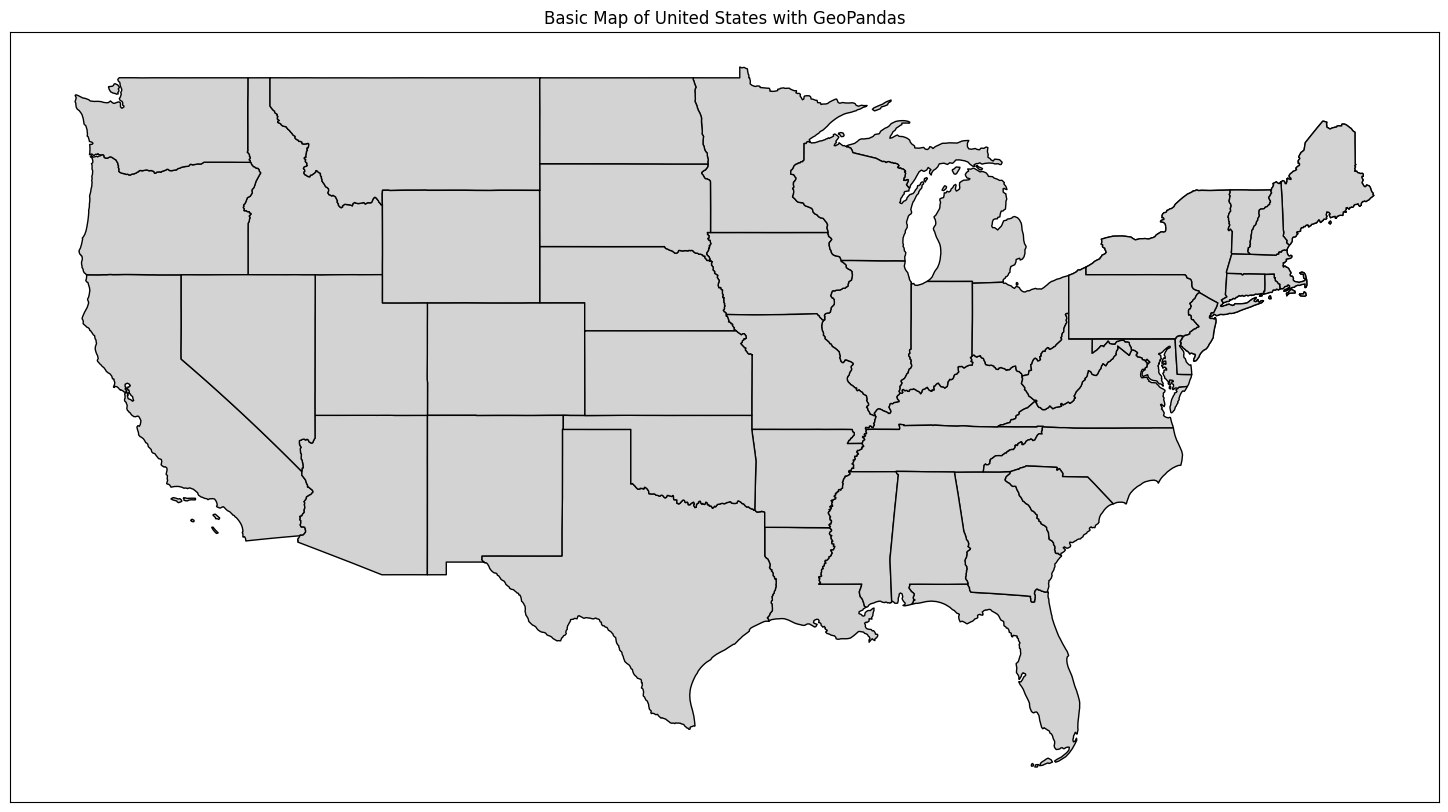

In [3]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the United States
df.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black"
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of United States with GeoPandas")
plt.show()

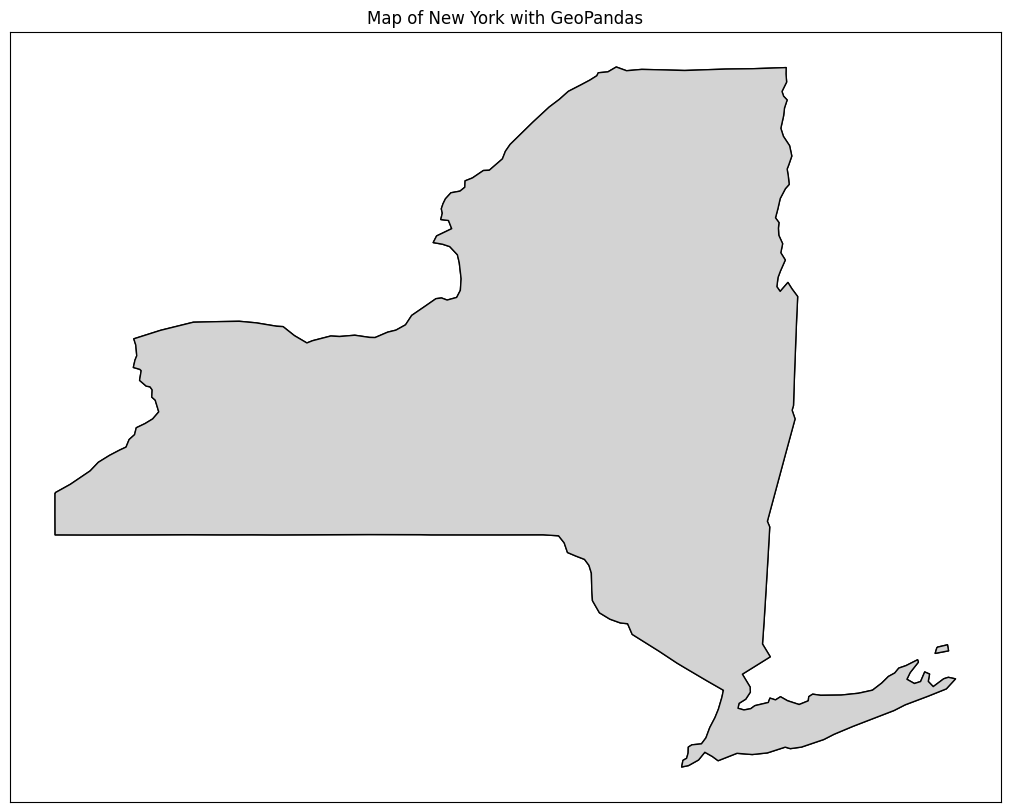

In [4]:
# initialize a fresh figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab the row for New York
new_york_df = df[df["NAME"] == "New York"]

# plot just the state of Maryland
new_york_df.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black"
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of New York with GeoPandas")
plt.show()

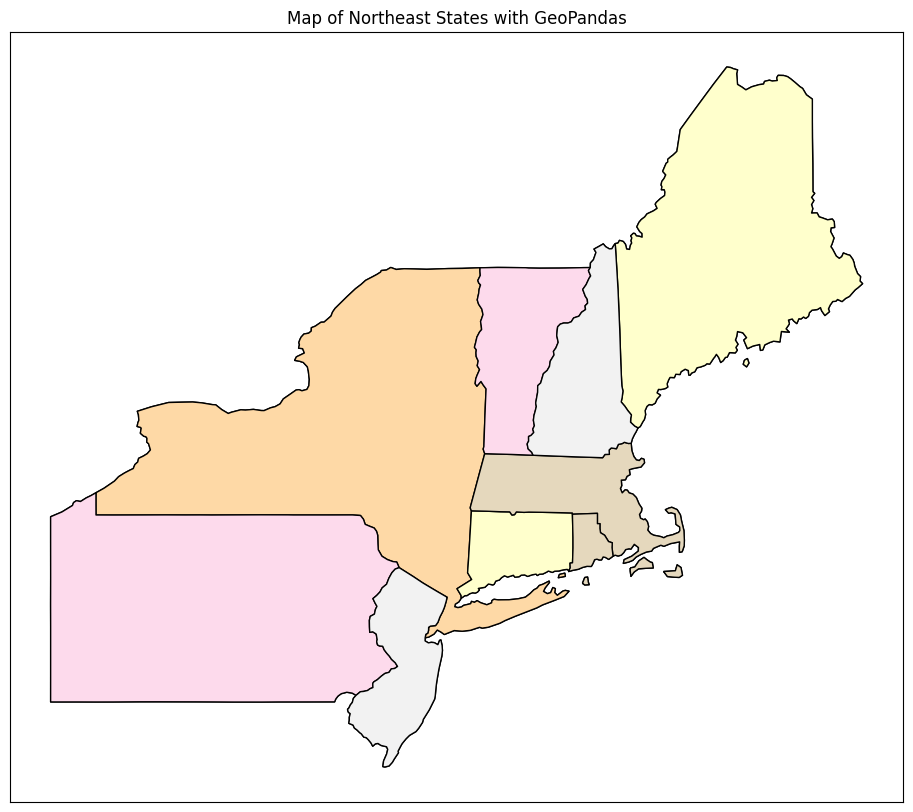

In [5]:
# initialize a fresh figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab all rows for the north-east of the United States, including Connecticut,
# Maine, Massachusetts, New Hampshire, Rhode Island, Vermont, New York,
# New Jersey, and Pennsylvania
north_east_df = df[
    df["STUSPS"].isin(["CT", "ME", "MA", "NH", "RI", "VT", "NY", "NJ", "PA"])
]

# plot the northeast states
north_east_df.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black"
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Northeast States with GeoPandas")
plt.show()

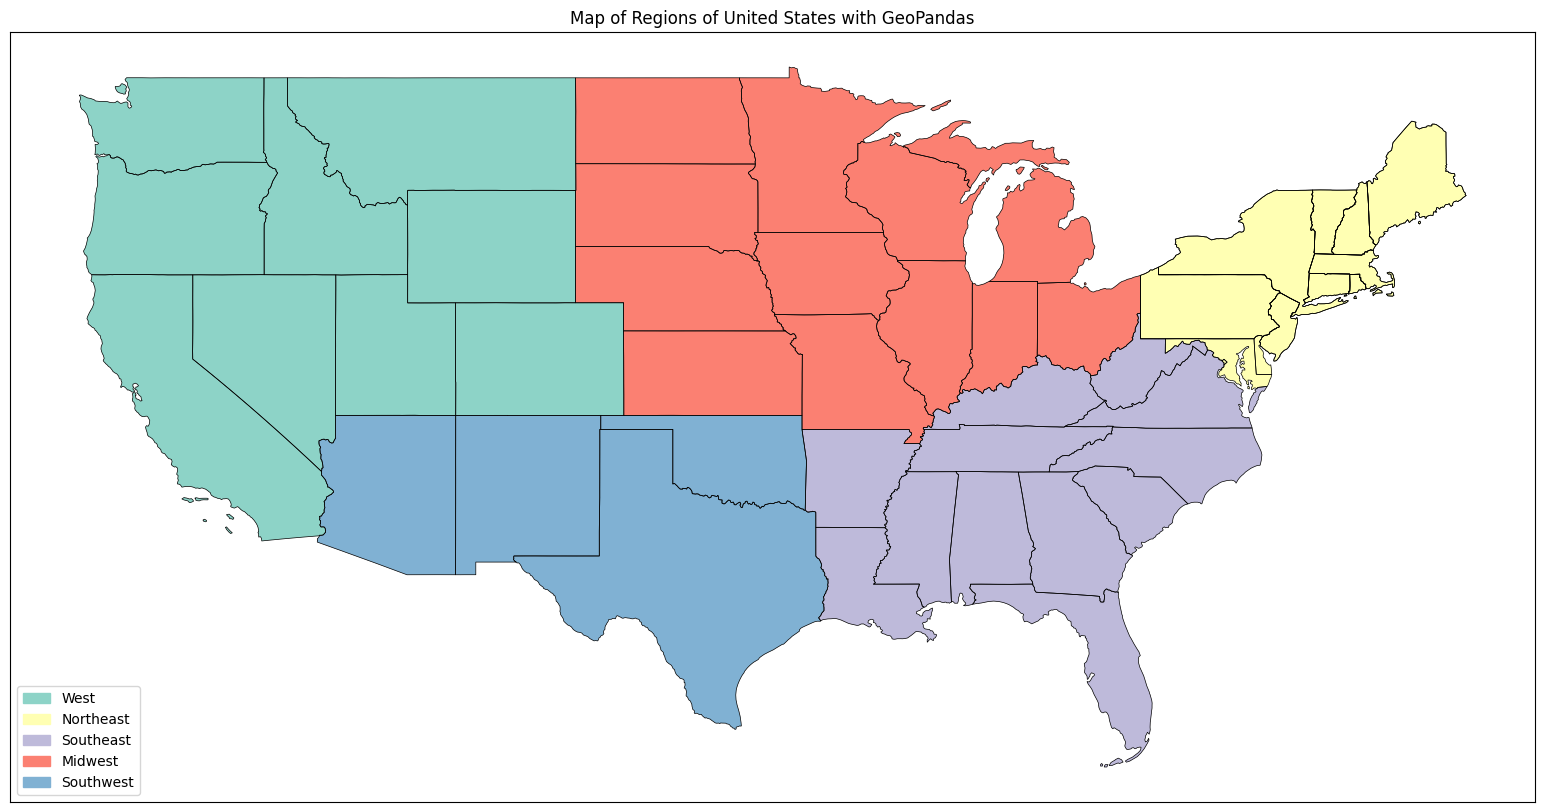

In [6]:
# extract the five regions of the United States, including west, northeast,
# southeast, midwest, and southwest
west_states = df[df["region"] == "West"]
northeast_states = df[df["region"] == "Northeast"]
southeast_states = df[df["region"] == "Southeast"]
midwest_states = df[df["region"] == "Midwest"]
southwest_states = df[df["region"] == "Southwest"]

# initialize a final empty figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# start by plotting a basic map of the United States
# plot a basic map of the United States
df.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# define our color scheme for the regions of the United States
colors = sns.color_palette("Set3", 5)

# plot each of the regions, giving each region a unique color
west_states.plot(ax=ax, color=colors[0])
northeast_states.plot(ax=ax, color=colors[1])
southeast_states.plot(ax=ax, color=colors[2])
midwest_states.plot(ax=ax, color=colors[3])
southwest_states.plot(ax=ax, color=colors[4])

# create custom legend patches for each of the regions
west_patch = mpatches.Patch(label="West", color=colors[0])
northeast_patch = mpatches.Patch(label="Northeast", color=colors[1])
southeast_patch = mpatches.Patch(label="Southeast", color=colors[2])
midwest_patch = mpatches.Patch(label="Midwest", color=colors[3])
southwest_patch = mpatches.Patch(label="Southwest", color=colors[4])

# add the patches to the map
ax.legend(
    handles=[
        west_patch,
        northeast_patch,
        southeast_patch,
        midwest_patch,
        southwest_patch,
    ],
    loc="lower left"
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Regions of United States with GeoPandas")
plt.show()